<a href="https://colab.research.google.com/github/660510762-Chidsanupong/660510762-Chidsanupong/blob/main/Lab06_SVM_660510762.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## 660510762 ชิษณุพงศ์ การะเกตุ

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [12]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

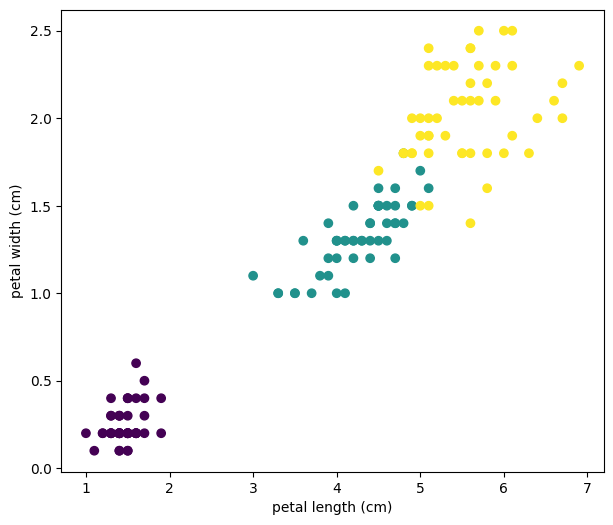

In [13]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [14]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [15]:
#TODO

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

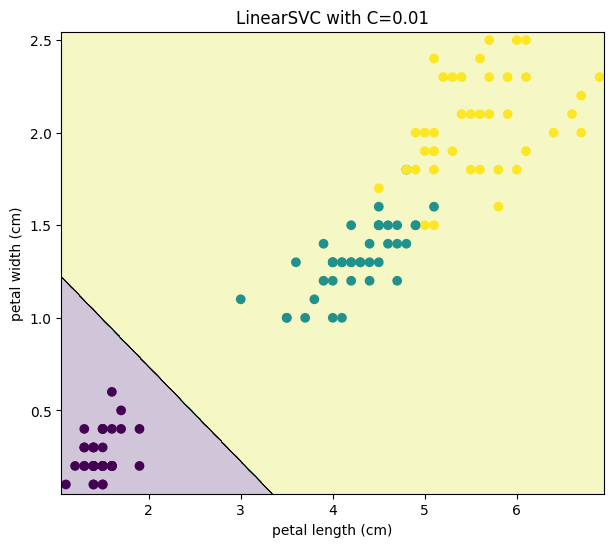

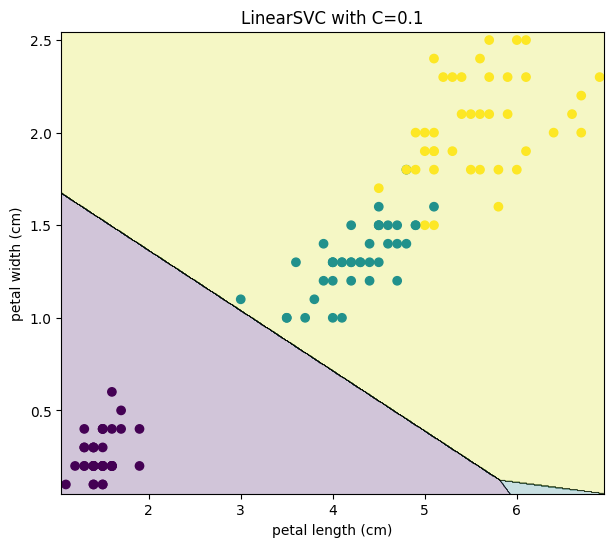

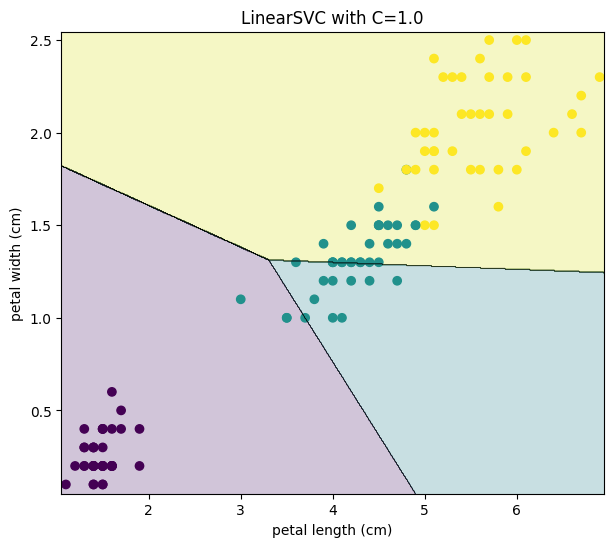

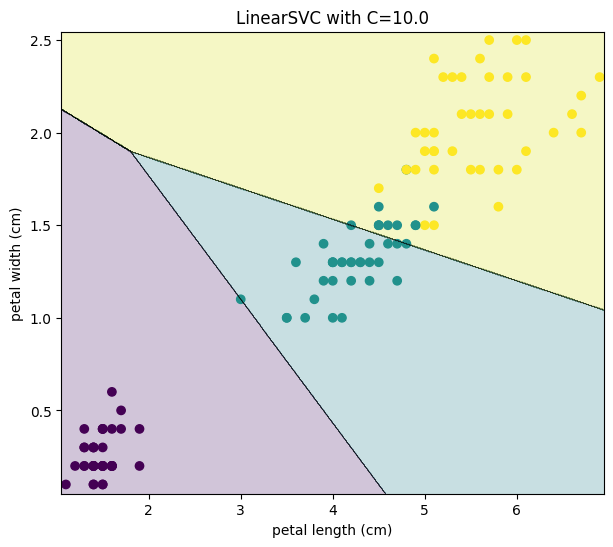

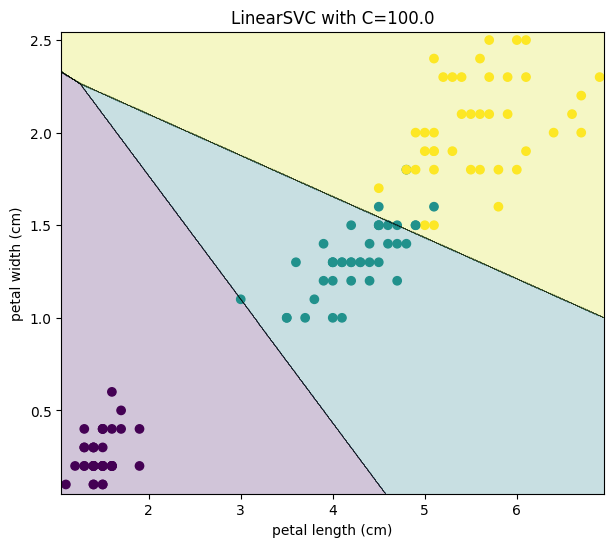

In [16]:
#TODO

from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    # สร้างโมเดล Linear SVM
    svm_clf = LinearSVC(loss='hinge', C=C, max_iter=100000, random_state=42)

    svm_clf.fit(X_train, y_train)

    plot_decision_boundary(svm_clf, X_train, y_train)
    plt.title(f"LinearSVC with C={C}")
    plt.show()

C เป็น trade-off parameter ระหว่าง margin และการจัดการ error

C เล็ก : อนุญาตให้มี margin กว้างขึ้น และยอมให้มีการจัดหมวดผิดได้มากขึ้น  boundary เรียบขึ้น

C ใหญ่ : บังคับให้โมเดลจัดหมวดผิดให้น้อยที่สุด  boundary พยายามผ่านจุดข้อมูลมากขึ้น อาจซับซ้อนและเสี่ยง overfitting

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [17]:
#TODO

from sklearn.metrics import accuracy_score

# เลือกค่า C ที่ต้องการ
C_chosen = 1.0

# ฝึกโมเดล Linear SVM
svm_clf = LinearSVC(loss='hinge', C=C_chosen, max_iter=100000, random_state=42)
svm_clf.fit(X_train, y_train)

# พยากรณ์ข้อมูล test
y_pred = svm_clf.predict(X_test)

# คำนวณ test error
test_error = 1 - accuracy_score(y_test, y_pred)
print(f"Test Error (C={C_chosen}): {test_error:.4f}")

Test Error (C=1.0): 0.3000


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

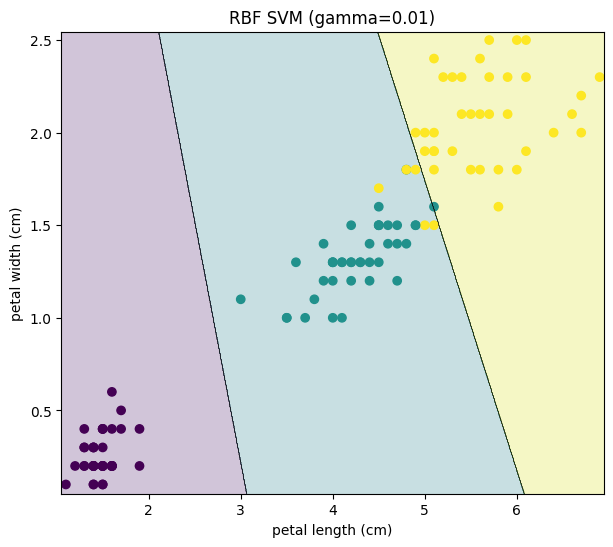

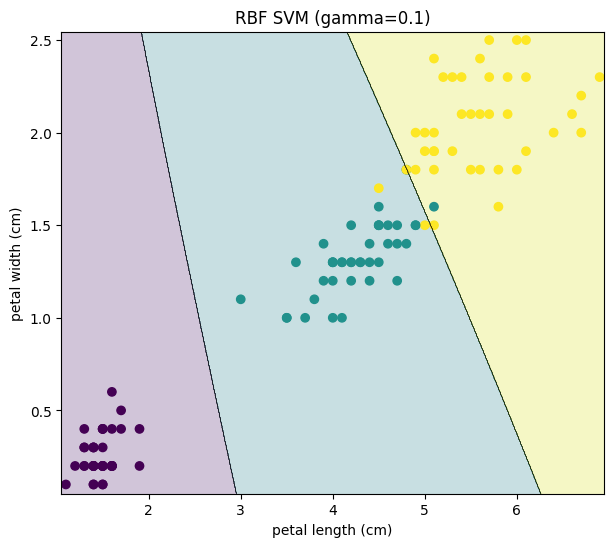

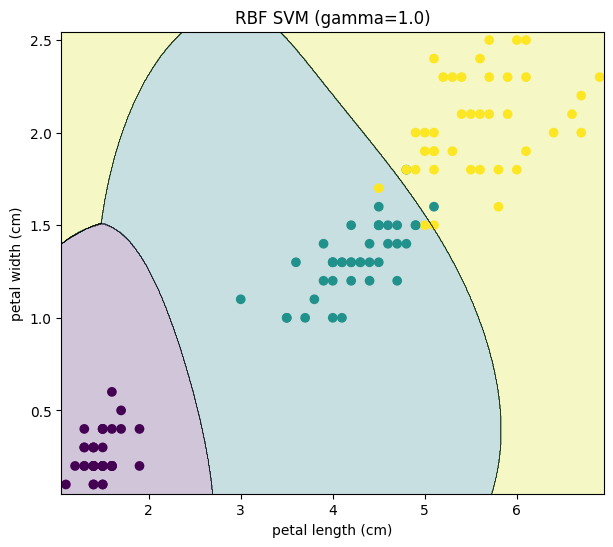

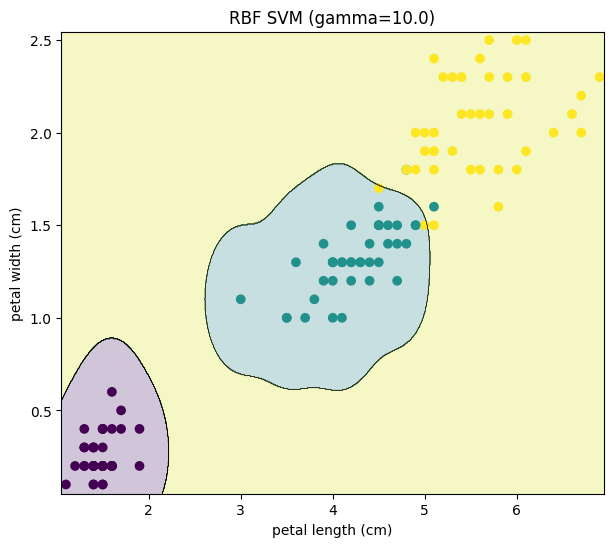

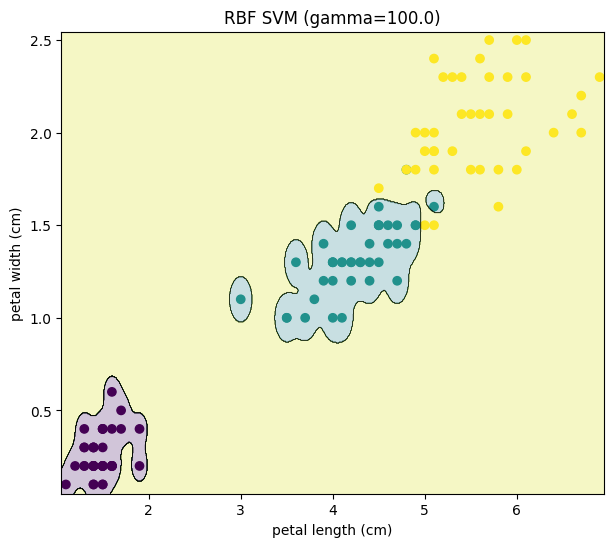

In [18]:
#TODO

from sklearn.svm import SVC
import matplotlib.pyplot as plt

gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for gamma in gamma_values:
    # สร้างโมเดล Kernel SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma=gamma, max_iter=100000, random_state=42)

    # ฝึกโมเดล
    svm_rbf.fit(X_train, y_train)

    # วาด decision boundary
    plot_decision_boundary(svm_rbf, X_train, y_train)
    plt.title(f"RBF SVM (gamma={gamma})")
    plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [19]:
#TODO

from sklearn.metrics import accuracy_score

# เลือก gamma ที่ต้องการ
gamma_chosen = 0.1

# สร้างและฝึกโมเดล SVM (RBF kernel)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=gamma_chosen, max_iter=100000, random_state=42)
svm_rbf.fit(X_train, y_train)

# พยากรณ์ข้อมูล test
y_pred = svm_rbf.predict(X_test)

# คำนวณ test error
test_error = 1 - accuracy_score(y_test, y_pred)

# จำนวน support vectors
num_support_vectors = len(svm_rbf.support_)

print(f"Test Error (gamma={gamma_chosen}): {test_error:.4f}")
print(f"Number of support vectors: {num_support_vectors}")

Test Error (gamma=0.1): 0.0667
Number of support vectors: 42


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

<Figure size 640x480 with 0 Axes>

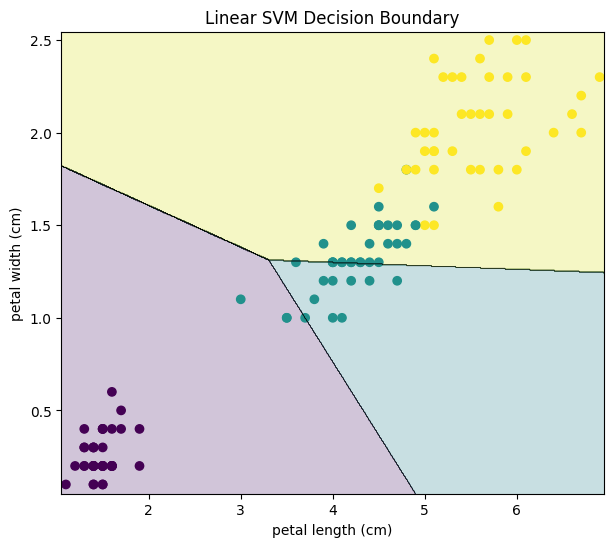

<Figure size 640x480 with 0 Axes>

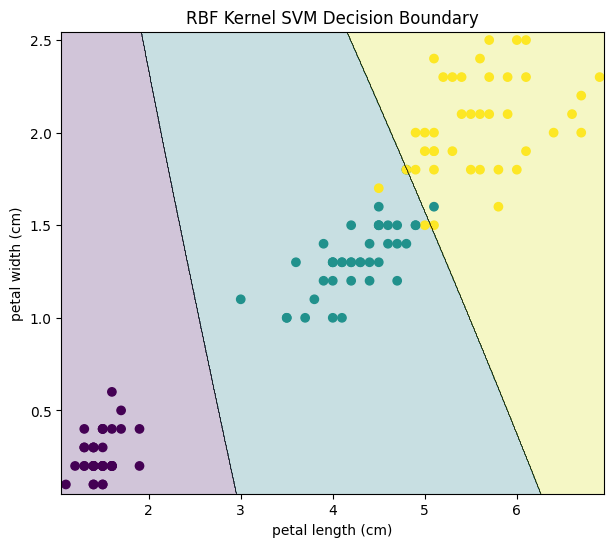

Linear SVM Test Accuracy: 0.7000
Kernel SVM Test Accuracy: 0.9333
Kernel SVM ให้ความแม่นยำสูงกว่า จับ pattern ที่ไม่เป็นเส้นตรงได้ดีกว่า Linear SVM


In [20]:
#TODO

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ===== Linear SVM =====
linear_svm = LinearSVC(loss='hinge', C=1.0, max_iter=100000, random_state=42)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

plt.figure()
plot_decision_boundary(linear_svm, X_train, y_train)
plt.title("Linear SVM Decision Boundary")
plt.show()

# ===== Kernel SVM (RBF) =====
kernel_svm = SVC(kernel='rbf', C=1.0, gamma=0.1, max_iter=100000, random_state=42)
kernel_svm.fit(X_train, y_train)
y_pred_kernel = kernel_svm.predict(X_test)
acc_kernel = accuracy_score(y_test, y_pred_kernel)

plt.figure()
plot_decision_boundary(kernel_svm, X_train, y_train)
plt.title("RBF Kernel SVM Decision Boundary")
plt.show()

# ===== เปรียบเทียบผล =====
print(f"Linear SVM Test Accuracy: {acc_linear:.4f}")
print(f"Kernel SVM Test Accuracy: {acc_kernel:.4f}")

if acc_kernel > acc_linear:
    print("Kernel SVM ให้ความแม่นยำสูงกว่า จับ pattern ที่ไม่เป็นเส้นตรงได้ดีกว่า Linear SVM")
elif acc_kernel < acc_linear:
    print("Linear SVM ให้ความแม่นยำสูงกว่า และ boundary เรียบกว่า")
else:
    print("ทั้งสองโมเดลให้ความแม่นยำใกล้เคียงกัน แต่ boundary ของ Kernel SVM อาจซับซ้อนกว่า")